# Introduction à la bioacoustique

La bioacoustique, c'est l'étude des signaux sonores produits par les animaux.
Dans cette activité, vous allez manipuler des signaux sonores pour découvrir les principaux concepts de la bioacoustique.

## Etape 1 : Enregistrement des sons

Dans cette activité, nous allons étudier vos voix.

Pour commencer, rendez-vous sur [ce site](https://online-voice-recorder.com/fr).
Vous allez vous enregistrer prononçant plusieurs phonèmes différents :
- Une longue syllabe **"AAAAA"**
- Une longue syllabe **"EEEEE"**
- Une longue syllabe **"IIIII"**
- Une longue syllabe **"OOOOO"**
- Une longue syllabe **"UUUUU"**
- Une longue syllabe **"FFFFF"**

Faites cinq exemplaires de chaque son. Essayez de produire des sons de 2 secondes, et laissez un peu de silence avant et après vos voix.

Renommez vos fichers avec le format suivant **SON_NOM_NUMERO** (par exemple, "AAAAA_BENTI_3.mp3"), déposez vos sons là **[PREVOIR ESPACE DE DEPOT]**, et enregistrez-les à une adresse connue sur votre PC.

## Etape 2 :  Caractériser les sons.

### Bon, c'est quoi au juste, un son ?

Maintenant que nous avons nos enregistrements, nous allons passer à l'analyse de vos voix.
Concrètement, à quoi ressemblent vos voix ?

In [8]:
# Code python pour le prétraitement et l'harmonisation des enregistrements
# Vous n'avez pas besoin de regarder les sections de code dans le détail
# Si ça vous intéresse ou si vous avez des questions, vous pouvez m'envoyer un mail : benjamin.benti@protonmail.com

%matplotlib inline

# Import des librairies nécessaires pour le traitement audio et la visualisation
import pathlib
import random as rd
import numpy as np
import pandas as pd
import librosa as lib
import soundfile as sf
import matplotlib.pyplot as plt
import scipy.signal as sig
from ipywidgets import interact, IntSlider, FloatSlider, fixed

# Récupérer la liste des fichiers.
audio_folder = pathlib.Path('C:/Users/benti/Desktop/UE_animalcomm_ia/enregistrements')  # LA IL FAUT CHANGER LE CHEMIN POUR RETROUVER VOS SONS.
file_list = [f for f in audio_folder.glob("*")]

# Prétraitement des enregistrements : filtre bande-bassante entre 50 et 7500 Hz, downsampling à 8000 Hz, harmonisation.
df = pd.DataFrame(columns=['ind', 'type', 'sound'], dtype=object)
for i, f in enumerate(file_list):
    # Charger l'enregistrement.
    y, sr = sf.read(f)
    
    # Construction d'un filtre bande-passante entre 50 Hz et 4000 Hz.
    sos = sig.butter(4, (50, 7500), btype="bp", output="sos", fs=sr)
    # Filtrer les enregistrements.
    y_filt = sig.sosfilt(sos, y, axis=0)
    
    # Harmoniser la fréquence d'échantillonage de tous les enregistrements à 8000 Hz.
    y_ds = sig.decimate(y_filt, round(sr/8000), axis=0)
    
    # Harmoniser l'amplitude des enregistrements.
    norm = np.max(np.abs(y_ds))
    y_harm = y_ds / norm

    # Stocker les enregistrements prétraités dans la base de données.
    fn = str(f)
    type = fn.split('\\')[-1].split('_')[0]
    ind = fn.split('\\')[-1].split('_')[1]
    df.loc[i, 'ind'] = ind
    df.loc[i, 'type'] = type
    df.loc[i, 'sound'] = y_harm

C:\Users\benti\Desktop\UE_animalcomm_ia\enregistrements\AAAAA_BENTI_1.mp3
C:\Users\benti\Desktop\UE_animalcomm_ia\enregistrements\AAAAA_BENTI_2.mp3
C:\Users\benti\Desktop\UE_animalcomm_ia\enregistrements\AAAAA_BENTI_3.mp3
C:\Users\benti\Desktop\UE_animalcomm_ia\enregistrements\AAAAA_BENTI_4.mp3
C:\Users\benti\Desktop\UE_animalcomm_ia\enregistrements\AAAAA_BENTI_5.mp3
C:\Users\benti\Desktop\UE_animalcomm_ia\enregistrements\EEEEE_BENTI_1.mp3
C:\Users\benti\Desktop\UE_animalcomm_ia\enregistrements\EEEEE_BENTI_2.mp3
C:\Users\benti\Desktop\UE_animalcomm_ia\enregistrements\EEEEE_BENTI_3.mp3
C:\Users\benti\Desktop\UE_animalcomm_ia\enregistrements\EEEEE_BENTI_4.mp3
C:\Users\benti\Desktop\UE_animalcomm_ia\enregistrements\EEEEE_BENTI_5.mp3
C:\Users\benti\Desktop\UE_animalcomm_ia\enregistrements\FFFFF_BENTI_1.mp3
C:\Users\benti\Desktop\UE_animalcomm_ia\enregistrements\FFFFF_BENTI_2.mp3
C:\Users\benti\Desktop\UE_animalcomm_ia\enregistrements\FFFFF_BENTI_3.mp3
C:\Users\benti\Desktop\UE_animalcomm_i

In [9]:
# Code python pour la visualisation des enregistrements.

def waveform_selecttime(y, sr, xmin=0, xmax=2.5):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot([i/sr for i in range(len(y))], y)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude (u. a.)')
    ax.set_xlim(xmin, xmax)

y = rd.choice(df.sound)
interact(waveform_selecttime, y=fixed(y), sr=fixed(8000), xmin=FloatSlider(min=0, max=5, step=0.001, value=0), xmax=FloatSlider(min=0, max=3.5, step=0.001, value=5))

interactive(children=(FloatSlider(value=0.0, description='xmin', max=5.0, step=0.001), FloatSlider(value=3.5, …

<function __main__.waveform_selecttime(y, sr, xmin=0, xmax=2.5)>

Un son, c'est un ensemble de vibrations de l'air : des fluctuations de pression de différentes fréquences et de différentes amplitudes.

Quand on enregistre un son, on obtient une forme d'onde, qui représente ces fluctuations au cours du temps. C'est un format plutôt obscur, il est difficile d'en extraire directement des informations.

Text(0.5, 1.0, 'Mini-quizz : quel est ce son ?')

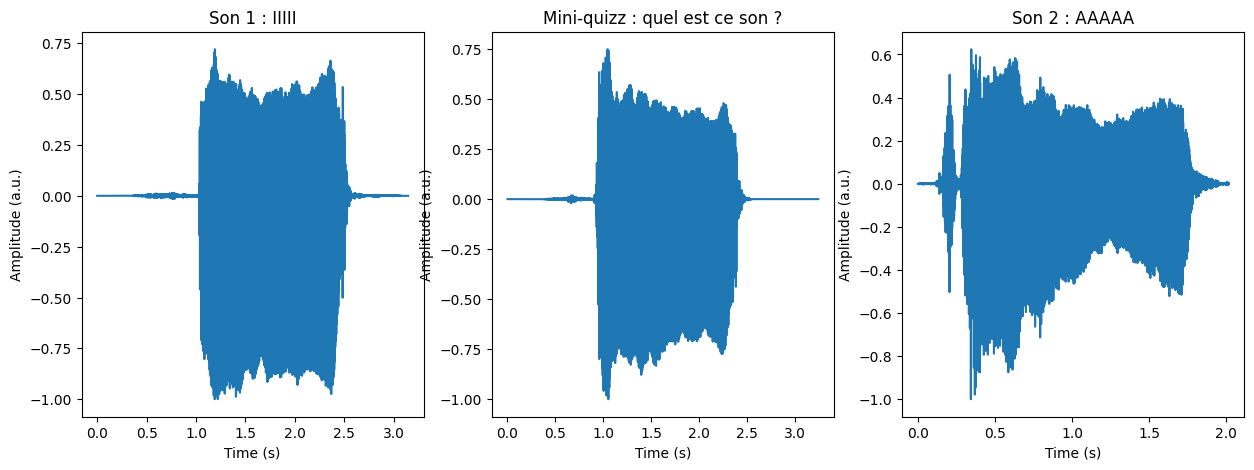

In [10]:
# Code python - mini-quizz sur les formes d'onde.

# Choisir des sons au hasard.
son1 = rd.choice(list(set(df.type)))
same = True
while same:
    son2 = rd.choice(list(set(df.type)))
    same = (son2 == son1)

ex1 = rd.choice(df.loc[df.type==son1].index)
ex2 = rd.choice(df.loc[df.type==son2].index)
same = True
while same:
    ex3 = rd.choice(pd.concat((df.loc[df.type==son1], df.loc[df.type==son2])).index)
    same = (ex3 == ex1 or ex3 == ex2)

# Construire la figure.
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(133)
ax3 = fig.add_subplot(132)

y1 = df.loc[ex1, 'sound']
ax1.plot([i/8000 for i in range(len(y1))], y1)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude (a.u.)')
y2 = df.loc[ex2, 'sound']
ax2.plot([i/8000 for i in range(len(y2))], y2)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude (a.u.)')
y3 = df.loc[ex3, 'sound']
ax3.plot([i/8000 for i in range(len(y3))], y3)
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Amplitude (a.u.)')

ax1.set_title('Son 1 : {}'.format(df.loc[ex1, 'type']))
ax2.set_title('Son 2 : {}'.format(df.loc[ex2, 'type']))
ax3.set_title('Mini-quizz : quel est ce son ?')


In [11]:
# Résultat du quizz.
print('Le son mystère était...')
print('drum rolls...')
print(df.loc[ex3, "type"])

Le son mystère était...
drum rolls...
IIIII


### Un outil magique pour visualiser et analyser les sons : le **spectrogramme**

On a vu qu'un son est un ensemble de fluctuations de pression à différentes amplitudes et à différentes fréquences. Il est très difficile d'évaluer ces fréquences et ces amplitudes en regardant la forme d'onde.

En bioacoustique, l'outil principal que l'on utilise pour mieux caractériser les sons, c'est le **spectrogramme**. C'est une transformation mathématique des sons qui permet de voir la composition en fréquences d'un son.

Text(0.5, 1.0, "Spectrogramme d'un IIIII")

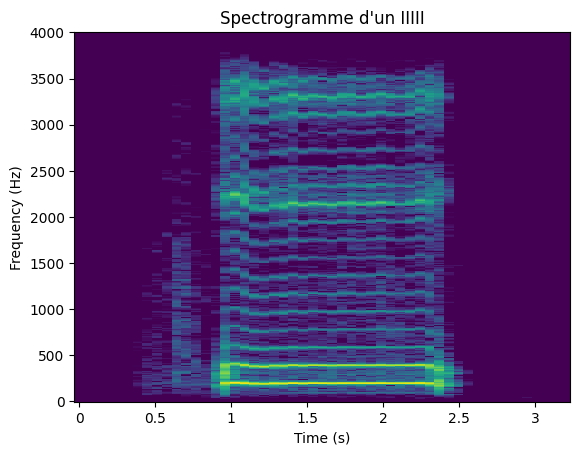

In [12]:
# Code python pour le calcul et la visualisation des spectrogrammes.

def custom_spectro(signal, nfft=1024, ovlp=0.5, win='hann'):
    """
    Computes the spectrogram of a signal using the input parameters.
    """
    wind = sig.get_window(win, nfft)
    S = lib.stft(signal, n_fft=nfft, hop_length=round(nfft*ovlp), window=wind)
    return S

def plot_spectro(S, sr, nfft, ovlp, fig, ax, cmap='viridis'):
    """
    Plots a spectrogram.
    """
    img = lib.display.specshow(lib.amplitude_to_db(np.abs(S), ref=np.max),
                               sr=sr, n_fft=nfft, hop_length=round(nfft*ovlp),
                               ax=ax, y_axis='linear', x_axis='time', cmap="viridis"
                               )    
    return fig, ax

# Construire le spectrogramme du son du quizz précédent.
S = custom_spectro(df.loc[ex3, 'sound'])
fig = plt.figure()
ax = fig.add_subplot()
plot_spectro(S, 8000, 1024, 0.5, fig, ax)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title("Spectrogramme d'un {}".format(df.loc[ex3, 'type']))

Dans les sons animaux, la distribution des fréquences n'est pas aléatoire.

In [13]:
# Code python pour l'analyse de la distribution des fréquences.

def magnitude_lines(y, sr, F0, xmax=4000):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.magnitude_spectrum(y, sr)
    for i in range(1, 1000):
        if F0*i <= 4000:
            ax.axvline(F0*i, color='black')
    ax.set_xlim(0, xmax)

interact(magnitude_lines,
         y=fixed(df.loc[ex3, 'sound']), sr=fixed(8000),
         F0=IntSlider(min=0, max=500, step=1, value=100),
         xmax=IntSlider(min=500, max=4000, step=500, value=4000)
        )

interactive(children=(IntSlider(value=100, description='F0', max=500), IntSlider(value=4000, description='xmax…

<function __main__.magnitude_lines(y, sr, F0, xmax=4000)>

### A vous de jouer !!

Utilisez le code de la cellule suivante pour mesurer, pour chacun de vos enregistrements :
- la fréquence fondamentale **F0**
- la fréquence d'intensité maximale **Fmax**
- la **durée**.

In [14]:
# Modifiez les lignes suivantes pour sélectionner votre enregistrement.
nom = 'BENTI'
son = 'AAAAA'
numero = 1

y = df.loc[df.ind==nom].loc[df.type==son].iloc[numero-1].sound

In [15]:
# Mesurer la durée
interact(waveform_selecttime, y=fixed(y), sr=fixed(8000),
         xmin=FloatSlider(min=0, max=3.5, step=0.001, value=0),
         xmax=FloatSlider(min=0, max=3.5, step=0.001, value=3.5)
        )

interactive(children=(FloatSlider(value=0.0, description='xmin', max=3.5, step=0.001), FloatSlider(value=3.5, …

<function __main__.waveform_selecttime(y, sr, xmin=0, xmax=2.5)>

In [18]:
# Mesure la fréquence fondamentale.
interact(magnitude_lines, y=fixed(y), sr=fixed(8000),
         F0=IntSlider(min=0, max=300, step=1, value=100),
         xmax=IntSlider(min=500, max=4000, step=500, value=4000)
        )

interactive(children=(IntSlider(value=100, description='F0', max=300), IntSlider(value=4000, description='xmax…

<function __main__.magnitude_lines(y, sr, F0, xmax=4000)>

In [17]:
# Mesurer la fréquence maximale.
s, f, l = plt.magnitude_spectrum(y, 8000)
plt.close()
print('La fréquence maximale de ce son est {} Hz'.format(round(f[np.argmax(s)])))

La fréquence maximale de ce son est 618 Hz


## Etape 3 : Analyser les variations sonores

Maintenant que nous avons :
1. Enregistré des sons et
2. Mesuré des paramètres acoustiques sur ces enregistrements,

nous pouvons procéder à des comparaisons intra- et inter-individuelles pour répondre à des questions biologiques.

### 1ère question : pouvons-nous décrire un mini-répertoire vocal pour l'être humain ?

['OOOOO', 'EEEEE', 'UUUUU', 'IIIII', 'FFFFF', 'AAAAA']


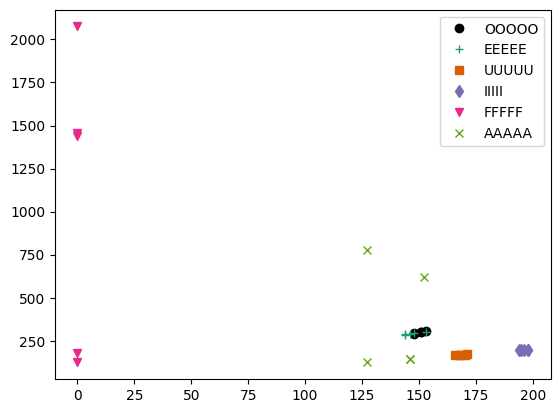

In [24]:
# Code pour représenter les mesures réalisées sur les différents types de sons.

tab = pd.read_csv('C:/Users/benti/Desktop/UE_animalcomm_ia/mesures/BENTI_mesures.csv')  # LA IL FAUT INDIQUER VOTRE FICHIER DE MESURE

fig = plt.figure()
ax = fig.add_subplot()
colorset = ["#000000", "#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e"]
markerset = ["o", "+", "s", "d", "v", 'x']
print(list(set(tab.type_de_son)))
for i, elt in enumerate(list(set(tab.type_de_son))):
    tmp = tab.loc[tab.type_de_son==elt]
    ax.plot(tmp.F0, tmp.Fmax, color=colorset[i], marker=markerset[i], linewidth=0)
    ax.legend(labels = list(set(tab.type_de_son)))

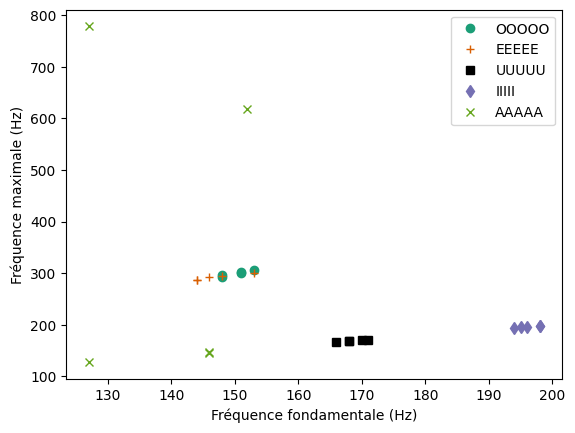

In [38]:
# Code pour représenter les mesures réalisées sur les différents types de sons, excluant les FFFFF.

tab = pd.read_csv('mesures/BENTI_mesures.csv')

fig = plt.figure()
ax = fig.add_subplot()
colorset = ["#1b9e77", "#d95f02", "#000000", "#7570b3", "#e7298a", "#66a61e"]
markerset = ["o", "+", "s", "d", "v", 'x']

lst = list(set(tab.type_de_son))
lst.remove('FFFFF')

for i, elt in enumerate(list(set(tab.type_de_son))):
    if elt == 'FFFFF':
        continue
    tmp = tab.loc[tab.type_de_son==elt]
    ax.plot(tmp.F0, tmp.Fmax, color=colorset[i], marker=markerset[i], linewidth=0)
    ax.set_xlabel('Fréquence fondamentale (Hz)')
    ax.set_ylabel('Fréquence maximale (Hz)')
    ax.legend(labels = lst)

## 2ème question: Existe-t-il des différences interindividuelles dans les voix humaines ? Comment les expliquer ?

(cf. activité "Voix des hommes" au début du TP)

In [30]:
# Code pour regrouper les mesures faites par différents membres du groupe.

#=====> Rentrer les noms des membres du groupe dans la liste.
liste_individus = ["BENTI"]

data = pd.DataFrame()
for i in liste_individus:
    tab = pd.read_csv("mesures/{}_mesures.csv".format(i))
    data = pd.concat((data, tab))

print(data)

      NOM type_de_son  numero   F0  Fmax  duree
0   BENTI       AAAAA       1  152   618    NaN
1   BENTI       AAAAA       2  127   778    NaN
2   BENTI       AAAAA       3  146   147    NaN
3   BENTI       AAAAA       4  146   146    NaN
4   BENTI       AAAAA       5  127   127    NaN
5   BENTI       EEEEE       1  144   286    NaN
6   BENTI       EEEEE       2  144   287    NaN
7   BENTI       EEEEE       3  148   294    NaN
8   BENTI       EEEEE       4  146   292    NaN
9   BENTI       EEEEE       5  153   300    NaN
10  BENTI       IIIII       1  194   194    NaN
11  BENTI       IIIII       2  195   195    NaN
12  BENTI       IIIII       3  198   198    NaN
13  BENTI       IIIII       4  198   198    NaN
14  BENTI       IIIII       5  196   196    NaN
15  BENTI       OOOOO       1  148   292    NaN
16  BENTI       OOOOO       2  148   297    NaN
17  BENTI       OOOOO       3  151   303    NaN
18  BENTI       OOOOO       4  151   301    NaN
19  BENTI       OOOOO       5  153   306

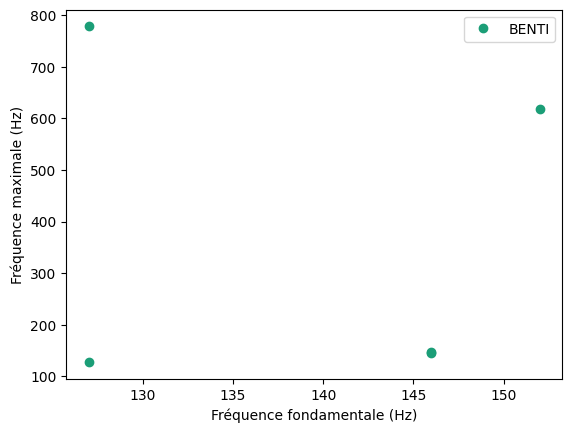

In [39]:
# Code pour comparer les mesures réalisées pour un même son par différents membres du groupe.

son = 'AAAAA'  # LA IL FAUT REMPLACER PAR LE SON QUI VOUS INTERESSE.

fig = plt.figure()
ax = fig.add_subplot()

color_set = ["#000000", "#009292", "#ff6db6", "#490092", "#006ddb",
              "#924900", "#004949", "#ffb6db", "#b66dff", "#6db6ff",
              "#db6d00"
              ]
markerset = ["o", "+", "s", "d", "v", 'x', "^", "8", "p", "*", "h"]
for i, ind in enumerate(liste_individus):
    tmp = data.loc[data.type_de_son==son].loc[data.NOM==ind]
    ax.plot(tmp.F0, tmp.Fmax, color=colorset[i], marker=markerset[i], linewidth=0)
    ax.set_xlabel('Fréquence fondamentale (Hz)')
    ax.set_ylabel('Fréquence maximale (Hz)')
    ax.legend(labels = liste_individus)